### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第72天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/06/02
### 改版日期:  
### 改版備註:

# 作業目標:
    寫出 ReLU & dReLU 一階導數
    並列印


# 作業重點

# Rectified Linear Unit- Relu 

f(x)=max(0,x)


### ANS:

#### 參考網址
[深度學習激勵函數介紹]( http://cvfiasd.pixnet.net/blog/post/275774124-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E6%BF%80%E5%8B%B5%E5%87%BD%E6%95%B8%E4%BB%8B%E7%B4%B9 "深度學習激勵函數介紹")

[激活函数总结]( https://zhuanlan.zhihu.com/p/73214810 "激活函数总结")

##### ReLU函數介紹:

$ f(x)=max(0,x) $

若值為正數，則輸出該值大小，若值為負數，則輸出為0，ReLU函數並不是全區間皆可微分，但是不可微分的部分可以使用Sub-gradient進行取代，ReLU是近年來最頻繁被使用的激勵函數，因其存在以下特點，包含:解決梯度爆炸問題、計算數度相當快、收斂速度快等特性，以下會進行詳細解析。

1. 解決梯度消失問題 (vanishing gradient problem)
對於使用誤差反向傳遞運算(BN)之類神經網路來說，更新權重時，梯度計算的考量最為重要，使用Sigmoid以及tan h函數容易發生梯度消失問題，當輸入值接近飽和區(sigmoid函數在 [-4, +4] 之外)進行激發時，一階微分值趨近於0，梯度消失問題發生，使得誤差反向傳遞計算，無法有效地進行權重更新，而神經網路層數加深時更為明顯，因此，是深度神經網路訓練時會遭遇到之困難，而ReLU的分段線性性質能有效地克服梯度消失之問題。

2.  計算量大幅降低:
ReLU函數相較於Sigmoid以及tan h來說，大幅下降計算量，無需使用任何指數運算，只需要判斷輸入值是否大於0，來進行輸出。

3. 生物事實(細胞激活現象):
對於細胞的刺激未達到一定強度時，神經元不會進行訊息傳遞，但當超越啟動之強度時，會引起神經衝動，而進行訊息之傳遞，ReLU函數成功模擬了此現象。

4. 類神經網路的稀疏性(奧卡姆剃刀原則):
ReLU激勵函數會使負數部分的神經元輸出為0，可以讓網路變得更加多樣性，如同Dropout的概念，可以緩解過擬合(Over fitting)之問題，但會衍生Dead ReLU的問題，當某個神經元輸出為0後，就難以再度輸出，當遇到以下兩種情形時容易導致dead ReLU發生。

>4.1. 初始化權重設定為不能被激活的數值。

>4.2. 學習率設置過大，在剛開始進行誤差反向傳遞時，容易修正權重值過大，導致權重梯度為0，神經元即再也無法被激活。

##### Leaky ReLU函數介紹:

$ f(x)=max(0.01x,x) $

為了解決Dead ReLU Problem，Leaky ReLU將ReLU的前半段輸出設為0.01x，如此一來，即能防止值為負號時永遠無法被激活之問題，且理論上來說，Leaky ReLU擁有ReLU的所有優點，也成功避免Dead ReLU Problem的問題產生，但是於實際使用上，並沒有辦法完全證明Leaky ReLU永遠優於ReLU。

In [13]:
import numpy as np
from numpy import *
import matplotlib.pylab as plt
%matplotlib inline

'''
作業:
    寫出 ReLU & dReLU 一階導數
    並列印
'''

'\n作業:\n    寫出 ReLU & dReLU 一階導數\n    並列印\n'

In [14]:
def ReLU(x):
    '''
    ReLU 激發函數
    '''
    return abs(x)*(x>0)

In [15]:
def dReLU(x):
    '''
    dReLU 一階導數
    '''
    return (1*(x>0))

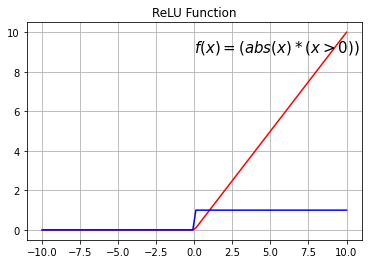

In [16]:
# 測試函式
x = plt.linspace(-10,10,100)

plt.plot(x,ReLU(x),'r')
plt.plot(x,dReLU(x),'b')

# Draw the grid line in background.
plt.grid()

# Title
plt.title('ReLU Function')

# write the ReLU formula
plt.text(0, 9, r'$f(x)= (abs(x) * (x > 0))$', fontsize=15)

# create the graph
plt.show()